In [15]:
import pandas as pd


In [38]:
performance_df = pd.read_csv('../data/curated/models_performance/all_included_ALL_NO_1_1_1_models_performance.csv')

In [39]:
len(performance_df)

48

Let´s review the accuracy of knn models

In [40]:
performance_df.columns

Index(['Unnamed: 0', 'accuracy_test', 'before_data', 'elapsed_time', 'model',
       'model_type', 'params', 'score', 'sweep_buy_sell', 'sweep_grid',
       'sweep_news_agg', 'sweeps_market_variables'],
      dtype='object')

In [41]:
def correct(row):
    model_index = row['Unnamed: 0']
    model = ''
    if model_index == 0: model = 'kn'
    elif model_index == 1: model = 'svc-rbf'
    elif model_index == 2: model = 'svc-poly'
    elif model_index == 3: model = 'dtree'
    elif model_index == 4: model = 'rforest'
    elif model_index == 5: model = 'xgb'
    elif model_index == 6: model = 'gboosting'
    elif model_index == 7: model = 'ada'

    return model

In [42]:
performance_df['model'] = performance_df.apply(lambda row: correct(row), axis=1)

Let´s get the top-5 models ranked by performance level

In [44]:
performance_df.sort_values(by=['accuracy_test'], ascending = False).head(5)

,Unnamed: 0,accuracy_test,before_data,elapsed_time,model,model_type,params,score,sweep_buy_sell,sweep_grid,sweep_news_agg,sweeps_market_variables
36,4,0.54,included,40.37,rforest,clf,"{'max_depth': 6, 'min_samples_leaf': 20, 'n_es...",0.52,60_120,basic,ALL_NO_1_1_1,all
38,6,0.53,included,32.54,gboosting,clf,{'n_estimators': 50},0.51,60_120,basic,ALL_NO_1_1_1,all
37,5,0.52,included,20.47,xgb,clf,{'n_estimators': 10},0.51,60_120,basic,ALL_NO_1_1_1,all
39,7,0.51,included,5.51,ada,clf,{'n_estimators': 10},0.48,60_120,basic,ALL_NO_1_1_1,all
12,4,0.51,included,38.08,rforest,clf,"{'max_depth': 6, 'min_samples_leaf': 10, 'n_es...",0.48,30_60,basic,ALL_NO_1_1_1,all


In [105]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [59]:
df = pd.read_csv('../data/curated/ALL_NO_3_2_1-all-included-15_60-basic.csv')

In [68]:
df.head(2)

,Unnamed: 0,datetime,new_id,forecast_error_ratio,forecast_error_ratio_zscore,previous_error_ratio,total_error_ratio,total_error_ratio_zscore,fe_accurate,fe_better,...,close_240_210_before,low_240_210_before,high_240_210_before,volatility_240_210_before,pips_agg_240_210_before,pips_candle_240_210_before,direction_candle_240_210_before,direction_agg_240_210_before,direction_agg_30_60_after,pips_agg_30_60_after
0,0,2007-01-08 15:00:00,12,127.78,0.0,0.0,127.78,0.0,0,1,...,13009,13001,13014,13,9,1,0,1,0,1
1,1,2007-01-09 10:00:00,37,0.00,0.0,0.0,0.00,0.0,1,0,...,13024,13024,13037,13,-24,-8,-1,-2,0,-2


In [80]:
columns_of_model= ['pips_agg_0_5_after', 'low_10_5_before', 'low_180_150_before', 'pe_worse', 'close_30_25_before', 
                   'pips_agg_20_15_before', 'low_25_20_before', 'volatility_25_20_before', 'High', 'pips_agg_10_15_after', 
                   'close_120_90_before', 'direction_agg_30_25_before', 'low_210_180_before', 'direction_agg_180_150_before',
                   'pe_better', 'close_45_30_before', 'close_25_20_before', 'pips_agg_30_25_before', 'fe_worse', 
                   'direction_candle_90_60_before', 'close_60_45_before', 'direction_agg_90_60_before', 
                   'pips_candle_210_180_before', 'direction_candle_180_150_before', 'pips_candle_10_15_after',
                   'low_45_30_before', 'pips_candle_180_150_before', 'forecast_error_ratio', 'pips_agg_25_20_before',
                   'previous_error_ratio', 'low_90_60_before', 'direction_agg_60_30_before', 'direction_agg_20_15_before',
                   'pips_candle_150_120_before', 'low_240_210_before', 'volatility_5_10_after', 'pips_candle_240_210_before', 
                   'direction_agg_10_5_before', 'close_150_120_before', 'volatility_240_210_before', 'pips_candle_90_60_before',
                   'pips_candle_45_30_before', 'pips_agg_15_10_before', 'low_10_15_after', 'pips_candle_0_5_after',
                   'direction_agg_15_10_before', 'pips_agg_45_30_before', 'direction_candle_0_5_after', 'low_30_25_before',
                   'pips_agg_10_5_before', 'pips_candle_10_5_before', 'pips_agg_180_150_before', 'pips_candle_30_25_before', 
                   'total_error_ratio_zscore', 'direction_candle_25_20_before', 'volatility_210_180_before', 'total_error_ratio',
                   'direction_agg_5_10_after', 'direction_agg_210_180_before', 'direction_candle_60_30_before', 'low_15_10_before',
                   'volatility_20_15_before', 'close_0_5_after', 'pips_agg_5_0_before', 'close_180_150_before', 'close_60_30_before',
                   'direction_candle_30_25_before', 'volatility_150_120_before', 'pips_agg_5_10_after', 'pips_agg_60_30_before',
                   'direction_candle_5_0_before', 'high_60_30_before', 'close_5_10_after', 'direction_agg_240_210_before', 
                   'direction_agg_25_20_before', 'high_15_10_before', 'pips_candle_5_0_before', 'low_5_0_before',
                   'high_240_210_before', 'direction_candle_60_45_before', 'num_news', 'direction_agg_10_15_after', 
                   'low_60_30_before', 'volatility_60_45_before', 'direction_candle_10_5_before', 'fe_better', 
                   'direction_agg_120_90_before', 'fe_accurate', 'direction_candle_15_10_before', 'close_5_0_before',
                   'high_60_45_before', 'pe_accurate', 'Medium', 'volatility_10_5_before', 'close_210_180_before', 
                   'low_5_10_after', 'pips_candle_15_10_before', 'pips_candle_120_90_before', 'close_20_15_before',
                   'pips_candle_60_45_before', 'high_20_15_before', 'volatility_180_150_before', 
                   'volatility_120_90_before', 'volatility_10_15_after', 'high_5_10_after', 'volatility_45_30_before',
                   'pips_agg_210_180_before', 'direction_candle_10_15_after', 'high_30_25_before', 'low_0_5_after',
                   'forecast_error_ratio_zscore', 'high_90_60_before', 'volatility_60_30_before', 'high_180_150_before',
                   'direction_agg_0_5_after', 'new_id', 'high_25_20_before', 'direction_candle_210_180_before', 
                   'direction_agg_5_0_before', 'high_210_180_before', 'low_150_120_before', 'pips_agg_240_210_before',
                   'Low', 'volatility_90_60_before', 'pips_agg_120_90_before', 'volatility_30_25_before',
                   'high_150_120_before', 'pips_candle_60_30_before', 'volatility_5_0_before', 'volatility_15_10_before',
                   'close_90_60_before', 'direction_candle_150_120_before', 'high_5_0_before', 'high_0_5_after',
                   'direction_agg_60_45_before', 'pips_candle_20_15_before', 'pips_agg_60_45_before', 'pips_candle_25_20_before',
                   'low_120_90_before', 'direction_candle_240_210_before', 'direction_candle_5_10_after', 'close_10_15_after',
                   'direction_candle_45_30_before', 'high_10_5_before', 'pips_agg_150_120_before', 'low_20_15_before', 
                   'low_60_45_before', 'direction_agg_45_30_before', 'close_10_5_before', 'direction_candle_120_90_before', 
                   'close_15_10_before', 'direction_candle_20_15_before', 'pips_agg_90_60_before', 'high_45_30_before',
                   'direction_agg_150_120_before', 'high_120_90_before', 'volatility_0_5_after', 'close_240_210_before',
                   'pips_candle_5_10_after', 'high_10_15_after']
columns_to_predict=['direction_agg_30_60_after']

In [81]:
len(columns_of_model)

160

In [82]:
len(df)

6460

In [99]:
X = df[columns_of_model].values
y = df[columns_to_predict[0]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
clf_kn = GridSearchCV(KNeighborsClassifier(n_neighbors=1),
                          param_grid={"n_neighbors": range(1, 100, 10)},
                          scoring="accuracy",
                          cv=5)
clf_kn.fit(X_train, y_train)
y_predict = clf_kn.predict(X_test)
print(format(accuracy_score(y_predict, y_test), '.2f'))

0.26


In [101]:
performance_df[performance_df['model'] == 'kn']

,Unnamed: 0,accuracy_test,before_data,elapsed_time,model,model_type,params,score,sweep_buy_sell,sweep_grid,sweep_news_agg,sweeps_market_variables
0,0,0.27,included,5.15,kn,clf,{'n_neighbors': 71},0.26,15_60,basic,ALL_NO_1_1_1,all
8,0,0.28,included,5.38,kn,clf,{'n_neighbors': 1},0.27,30_60,basic,ALL_NO_1_1_1,all
16,0,0.25,included,5.36,kn,clf,{'n_neighbors': 11},0.26,30_90,basic,ALL_NO_1_1_1,all
24,0,0.23,included,5.37,kn,clf,{'n_neighbors': 11},0.25,30_120,basic,ALL_NO_1_1_1,all
32,0,0.30,included,6.04,kn,clf,{'n_neighbors': 1},0.28,60_120,basic,ALL_NO_1_1_1,all
40,0,0.29,included,6.28,kn,clf,{'n_neighbors': 11},0.29,60_240,basic,ALL_NO_1_1_1,all


In [98]:
print(classification_report(y_test, clf_kn.predict(X_test)))

              precision    recall  f1-score   support

          -2       0.22      0.09      0.13       205
          -1       0.19      0.13      0.15       292
           0       0.27      0.66      0.38       313
           1       0.23      0.15      0.18       272
           2       0.32      0.09      0.14       210

   micro avg       0.25      0.25      0.25      1292
   macro avg       0.25      0.23      0.20      1292
weighted avg       0.24      0.25      0.21      1292



In [102]:
clf_kn.best_params_

{'n_neighbors': 91}

In [ ]:
clf_kn.

In [103]:
y_predict_prob = clf_kn.predict_proba(X_test)

In [104]:
y_predict_prob[0:4]

array([[0.23076923, 0.24175824, 0.18681319, 0.17582418, 0.16483516],
       [0.02197802, 0.30769231, 0.28571429, 0.31868132, 0.06593407],
       [0.12087912, 0.24175824, 0.37362637, 0.18681319, 0.07692308],
       [0.0989011 , 0.21978022, 0.34065934, 0.25274725, 0.08791209]])

In [107]:
confusion_matrix(y_test, clf_kn.predict(X_test))

array([[ 18,  52, 109,  26,   8],
       [  7,  53, 139,  35,  11],
       [  9,  59, 208,  52,  13],
       [  9,  55, 159,  47,  15],
       [ 18,  43, 104,  28,  15]])

In [116]:
confusion_matrix = pd.crosstab(y_test, clf_kn.predict(X_test), rownames=['True'], colnames=['Predicted'], margins=True)

In [136]:
for i in [-2,-1,0,1,2]:
    print(confusion_matrix[i][i])

18
53
208
47
15


In [132]:
confusion_matrix[-2][-2]

18

In [133]:
confusion_matrix['All'][0]

341

In [108]:
pd.crosstab(y_test, clf_kn.predict(X_test), rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,-2,-1,0,1,2,All
True,,,,,,
-2,18,52,109,26,8,213
-1,7,53,139,35,11,245
0,9,59,208,52,13,341
1,9,55,159,47,15,285
2,18,43,104,28,15,208
All,61,262,719,188,62,1292


In [109]:
len(y_test)

1292

In [111]:
(213 + 208)*100 / 1292

32.585139318885446

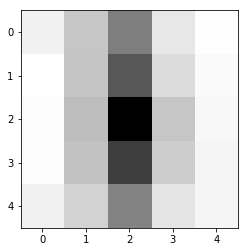

In [115]:
import matplotlib.pyplot as plt
conf = confusion_matrix(y_test, clf_kn.predict(X_test))
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()